<a href="https://colab.research.google.com/github/naqqaash/DSPL-Project--KJ-Marketing/blob/main/DSPL_data_preprocessing_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA conducted after pre processing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Justification: Import necessary libraries for data manipulation, visualization, and handling files.

In [ ]:
uploaded = files.upload()

Saving traincsv.csv to traincsv.csv


Justification: Upload the CSV file directly to Colab so you can load it into a DataFrame.

In [ ]:
df = pd.read_csv('traincsv.csv')

<ipython-input-3-1b4034d65097>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('traincsv.csv')


Justification: Read the CSV file into a pandas DataFrame, making it easier to analyze and preprocess.

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


Justification: Understand the structure and nature of the dataset — check data types, null values, and basic statistics.

In [ ]:
df.isnull().sum()


df.fillna(method='ffill', inplace=True)

<ipython-input-5-effdbf150cf5>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Justification: Why forward fill?
In time-series or sequential data, filling missing values with the previous value maintains continuity. If missing values aren’t sequential, you can also use mean/median imputation.



In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Justification: Duplicate records can bias analysis by over-representing certain data points.

In [ ]:
sns.boxplot(df['luxury_sales'])
plt.show()


Q1 = df['luxury_sales'].quantile(0.25)
Q3 = df['luxury_sales'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['luxury_sales'] >= Q1 - 1.5 * IQR) & (df['luxury_sales'] <= Q3 + 1.5 * IQR)]

NameError: name 'sns' is not defined

Justification: Outliers can skew model training and impact performance. Box plots help visualize outliers, while the Interquartile Range (IQR) method helps remove them.

In [ ]:
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')


df['total sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']

Justification: Feature Engineering. Creating new features that could offer better insights or improve model performance.

In [ ]:
df = pd.get_dummies(df, columns=['outlet_city'], drop_first=True)

Justification:Encoding Categorical Variables. Machine learning models require numerical input, so categorical variables like "outlet city" must be converted into numerical form.

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaler.fit_transform(df[['luxury_sales', 'fresh_sales', 'dry_sales']])

Justification: Scaling standardizes the range of numerical features, ensuring all features contribute equally to model training.

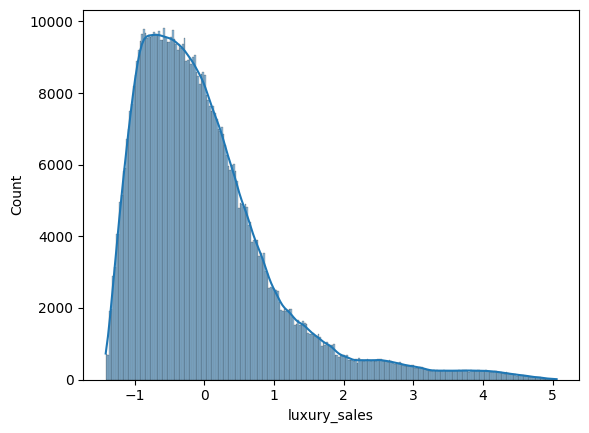

In [ ]:
sns.histplot(df['luxury_sales'], kde=True)
plt.show()

Justification: Understand the distribution of sales data across categories.

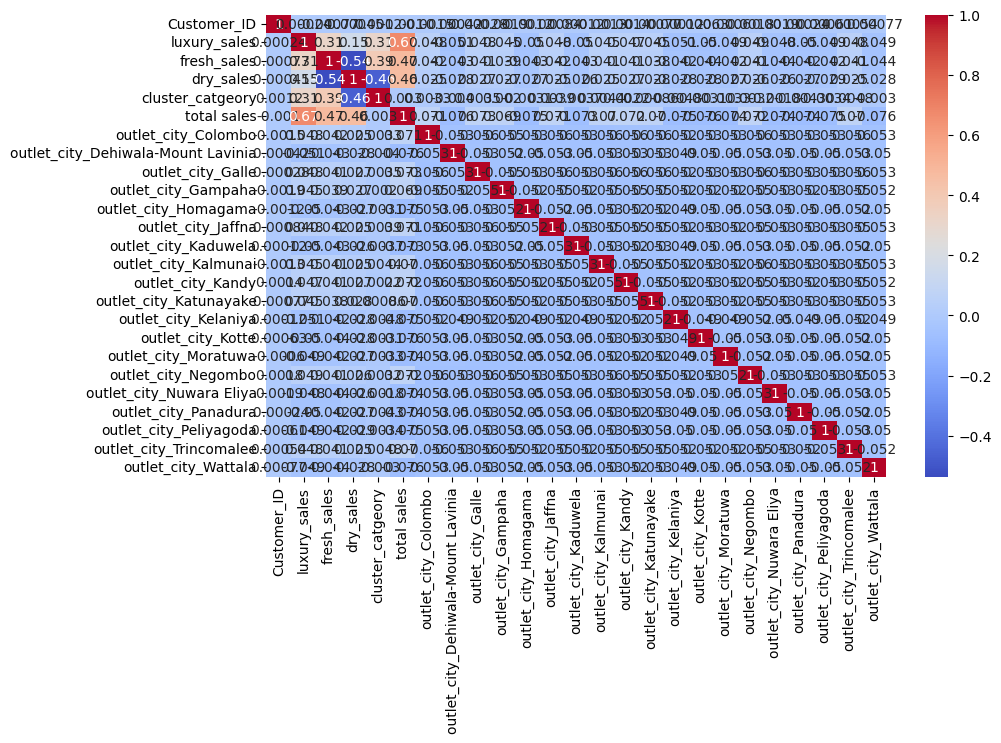

In [ ]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except (ValueError, TypeError):
        print(f"Could not convert column '{col}' to numeric")

corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Justification: Understand relationships between features — highly correlated features might be redundant.

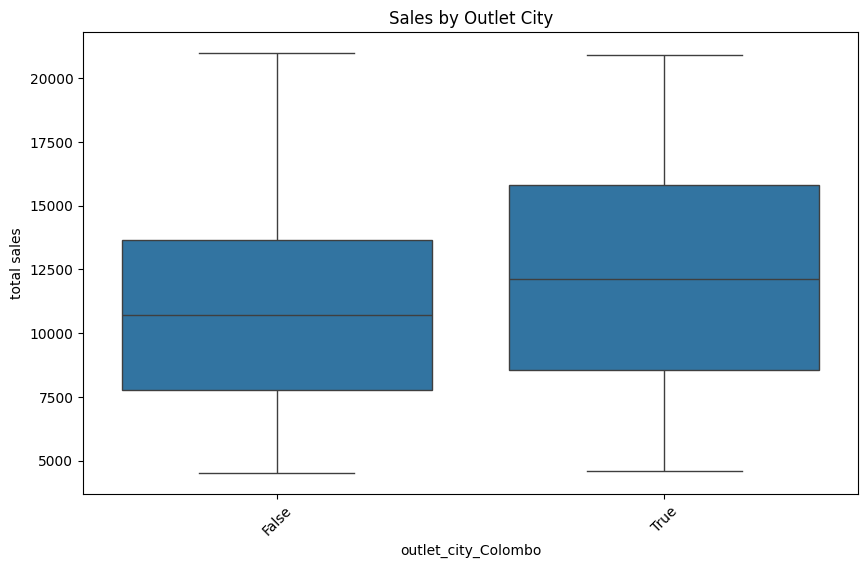

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='outlet_city_Colombo', y='total sales', data=df)
plt.title('Sales by Outlet City')
plt.xticks(rotation=45)
plt.show()

Justification: Helps detect outliers and spread of numerical data for data within Colombo.



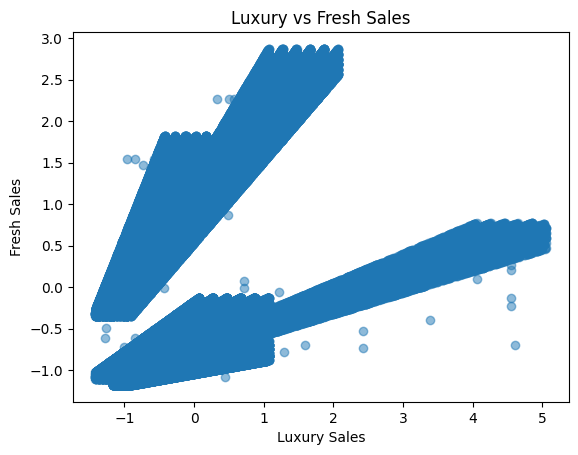

In [ ]:
plt.scatter(df['luxury_sales'], df['fresh_sales'], alpha=0.5)
plt.xlabel('Luxury Sales')
plt.ylabel('Fresh Sales')
plt.title('Luxury vs Fresh Sales')
plt.show()

Justification: Great for identifying correlations between two features.


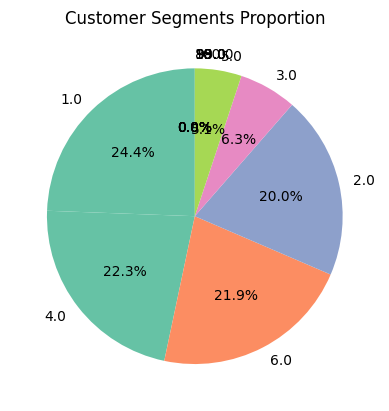

In [ ]:
df['cluster_catgeory'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Customer Segments Proportion')
plt.ylabel('')
plt.show()

Justification: Displays proportion of each category, like customer clusters.



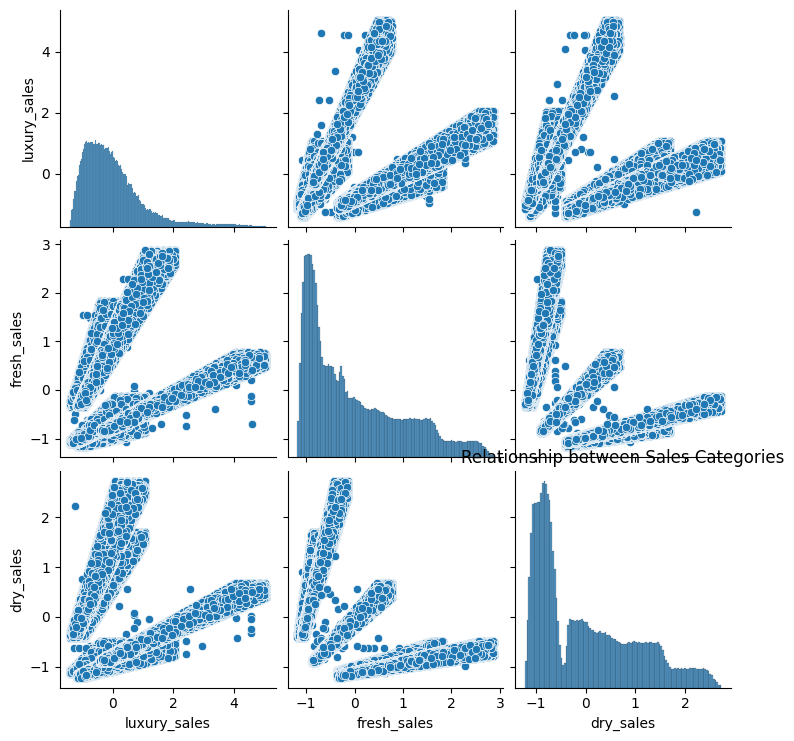

In [ ]:
sns.pairplot(df[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title('Relationship between Sales Categories')
plt.show()

Justification: Explore the relationships between different sales categories using scatter plots.

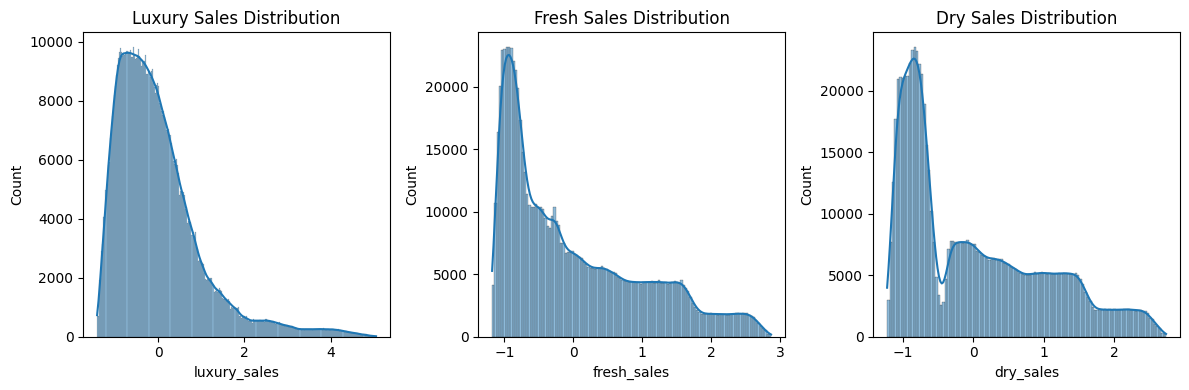

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['luxury_sales'], kde=True)
plt.title('Luxury Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['fresh_sales'], kde=True)
plt.title('Fresh Sales Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['dry_sales'], kde=True)
plt.title('Dry Sales Distribution')

plt.tight_layout()
plt.show()

Justification: Visualize the distribution of sales for each category (luxury, fresh, dry) using histograms.

In [ ]:
df.to_csv('processed_data.csv', index=False)
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>